In [1]:
import pandas as pd
from sklearn import datasets

# Load the iris dataset from sklearn
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target


In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.naive_bayes import GaussianNB

# Create a Naïve Bayes classifier instance
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Error rate (1 - accuracy)
error_rate = 1 - accuracy

# Display the confusion matrix and metrics
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy: 0.9778
Error Rate: 0.0222
Precision: 0.9794
Recall: 0.9778


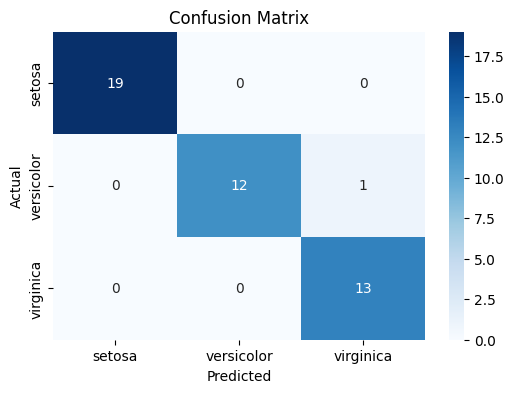

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()